In [59]:
# Решение задачи MNIST по предсказанию рукописных цифр от 0 до 9

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import models
from keras import layers
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
train=pd.read_csv('train.csv')

In [124]:
test=pd.read_csv('test.csv')

In [ ]:
submit=pd.read_csv('sample_submission.csv')

In [ ]:
# Данные содержат label(цифру) и 784 пикселя (28*28)

In [8]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [28]:
train.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [60]:
# Разобьем данные на тренировочный и тестовый набор
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [62]:
for train_index, test_index in split.split(train, train['label']):
    train_train=train.loc[train_index]
    train_test=train.loc[test_index]

In [82]:
X_train=train_train.drop('label',axis=1).values
X_train=X_train/255
X_test=train_test.drop('label',axis=1).values
X_test=X_test/255

In [126]:
kaggle_test=test/255
kaggle_test=kaggle_test.values

In [70]:
y_train=train_train[['label']].values
y_test=train_test[['label']].values

In [53]:
# кодировка цифр как категориального признака
ohe=OneHotEncoder(sparse=False)

In [75]:
y_train=ohe.fit_transform(y_train)
y_test=ohe.fit_transform(y_test)

In [98]:
# Структура нейросети на keras
opt = keras.optimizers.Adam(learning_rate=0.01)
model=models.Sequential()
model.add(layers.Dense(300, activation='relu',input_shape=(784,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [99]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(X_test, y_test))

Epoch 1/30
66/66 [==============================] - 2s 27ms/step - loss: 0.5474 - accuracy: 0.8441 - val_loss: 0.3138 - val_accuracy: 0.9067
Epoch 2/30
66/66 [==============================] - 2s 27ms/step - loss: 0.2332 - accuracy: 0.9309 - val_loss: 0.2062 - val_accuracy: 0.9396
Epoch 3/30
66/66 [==============================] - 2s 28ms/step - loss: 0.1603 - accuracy: 0.9544 - val_loss: 0.1679 - val_accuracy: 0.9495
Epoch 4/30
66/66 [==============================] - 2s 26ms/step - loss: 0.1233 - accuracy: 0.9626 - val_loss: 0.1267 - val_accuracy: 0.9615
Epoch 5/30
66/66 [==============================] - 2s 25ms/step - loss: 0.0941 - accuracy: 0.9729 - val_loss: 0.1196 - val_accuracy: 0.9623
Epoch 6/30
66/66 [==============================] - 2s 25ms/step - loss: 0.0769 - accuracy: 0.9772 - val_loss: 0.1304 - val_accuracy: 0.9576
Epoch 7/30
66/66 [==============================] - 2s 27ms/step - loss: 0.0611 - accuracy: 0.9819 - val_loss: 0.1674 - val_accuracy: 0.9483
Epoch 8/30
66

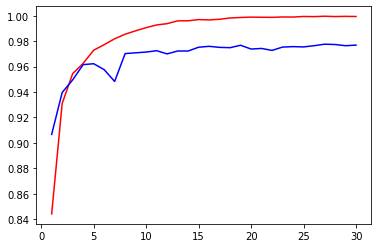

In [100]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b',color='r', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')

In [127]:
# Предсказание
predict=model.predict(kaggle_test)

In [144]:
predict[:5]

array([[1.1545199e-22, 3.0789942e-23, 1.0000000e+00, 3.2353591e-17,
        3.3052030e-18, 8.4018104e-25, 1.9720434e-21, 1.2795416e-15,
        1.0527639e-21, 1.0296750e-23],
       [1.0000000e+00, 2.1186265e-20, 3.4147235e-14, 1.2618679e-16,
        9.7657596e-20, 5.2799307e-09, 2.1975824e-14, 2.0704392e-14,
        1.5681503e-17, 2.6770578e-15],
       [1.5571137e-13, 8.8744436e-08, 9.7180406e-09, 1.3042262e-07,
        3.1194891e-06, 4.0442322e-10, 7.1254406e-13, 2.2313914e-08,
        5.2181986e-07, 9.9999607e-01],
       [1.4787413e-05, 1.6881273e-10, 6.1875052e-04, 3.8233157e-08,
        4.9840463e-03, 1.4603282e-10, 3.1657839e-09, 7.7525256e-06,
        1.9092093e-07, 9.9437439e-01],
       [1.0434647e-20, 6.1256382e-11, 3.4239767e-11, 1.0000000e+00,
        3.5006930e-21, 1.6144172e-10, 1.8044158e-22, 1.1894329e-16,
        1.2646926e-11, 2.0847070e-12]], dtype=float32)

In [142]:
sibmit_predict=[]
for i in predict:
    sibmit_predict.append(i.argmax())
sibmit_predict=np.array(sibmit_predict)

In [151]:
MNIST_submissions=pd.DataFrame({'ImageId':range(1,28001),'Label':sibmit_predict})
MNIST_submissions.set_index('ImageId', inplace=True)

In [153]:
MNIST_submissions.to_csv('MNIST_submissions.csv')

In [152]:
MNIST_submissions

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3
